In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import data

In [2]:
fslr = pd.read_csv('./data_first_solar_FSLR.csv')
gctay = pd.read_csv('./data_siemens_gamesa_GCTAY.csv')
spwr = pd.read_csv('./data_sunpower_SPWR.csv')
run = pd.read_csv('./data_sunrun_RUN.csv')
plug = pd.read_csv('./data_plug_power_PLUG.csv')

## Set datatime index

In [3]:
def set_datetime_index(df):
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('date', inplace=True)
    df.drop('Date', axis=1, inplace=True)
    return df

In [4]:
fslr = set_datetime_index(fslr)
gctay = set_datetime_index(gctay)
spwr = set_datetime_index(spwr)
run = set_datetime_index(run)
plug = set_datetime_index(plug)

# Import data normalized

In [5]:
fslr_normalized = pd.read_csv('./data_first_solar_FSLR_normalized.csv')
gctay_normalized = pd.read_csv('./data_siemens_gamesa_GCTAY_normalized.csv')
spwr_normalized = pd.read_csv('./data_sunpower_SPWR_normalized.csv')
run_normalized = pd.read_csv('./data_sunrun_RUN_normalized.csv')
plug_normalized = pd.read_csv('./data_plug_power_PLUG_normalized.csv')

In [6]:
fslr_normalized = set_datetime_index(fslr_normalized)
gctay_normalized = set_datetime_index(gctay_normalized)
spwr_normalized = set_datetime_index(spwr_normalized)
run_normalized = set_datetime_index(run_normalized)
plug_normalized = set_datetime_index(plug_normalized)

# Z-score normalization

In [7]:
def normalize_z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [8]:
fslr_z_score = normalize_z_score(fslr)
gctay_z_score = normalize_z_score(gctay)
spwr_z_score = normalize_z_score(spwr)
run_z_score = normalize_z_score(run)
plug_z_score = normalize_z_score(plug)

In [9]:
fslr_z_score

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2011-01-03,-0.787335,-1.338100,1.858724,1.293901,2.858337
2011-01-04,-0.871076,5.255186,0.153285,-0.796859,2.796021
2011-01-05,-0.770587,-1.338100,-0.402176,0.660424,2.814040
2011-01-06,-0.653350,2.089659,-0.792568,-1.533785,2.924031
2011-01-07,-0.485868,-1.104684,-2.629464,-1.594722,2.888369
...,...,...,...,...,...
2021-03-26,0.418532,0.086855,0.372799,0.632971,1.090595
2021-03-29,-0.284890,0.219524,0.216955,0.290982,0.937433
2021-03-30,0.401784,-0.529114,-0.044060,0.272908,1.122128



# Plotting Popularity Time Series

## Must keep 

In [128]:
start = '2020-01-01'
end = '2021-04-01'
window = 10

## Experiment

In [129]:
# start = '2019-01-01'
# end = '2021-04-01'
# window = 10

## FSLR

In [130]:
def plot_popularity_closing(start, end, title, xlabel, ylabel, series, data,window):
    ax1 = data[start:end][series[0]].plot(figsize=(8,7), title=title)
    ax2 = data[start:end][series[1]].rolling(window=window).mean().plot(figsize=(12,7), title=title)
    ax1.legend(series)
    ax1.autoscale(axis='x',tight=True)
    ax1.autoscale(axis='y',tight=True)
#     ax1.set(xlabel=xlabel, ylabel=ylabel);
    ax1.set(xlabel=xlabel);
    
    name_of_image =  title + '_' + series[0] + '_' + series[1]  
    plt.grid()
    plt.savefig('./plots_images/' + name_of_image)
    plt.show()

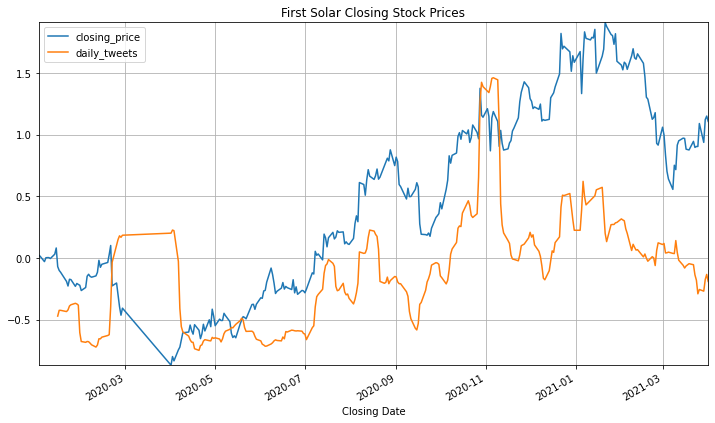

In [131]:
company = 'First Solar'
ticker = 'FSLR'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','daily_tweets']
data = fslr_z_score
plot_popularity_closing(start, end, title, xlabel, ylabel, series, data, window)

## GCTAY 

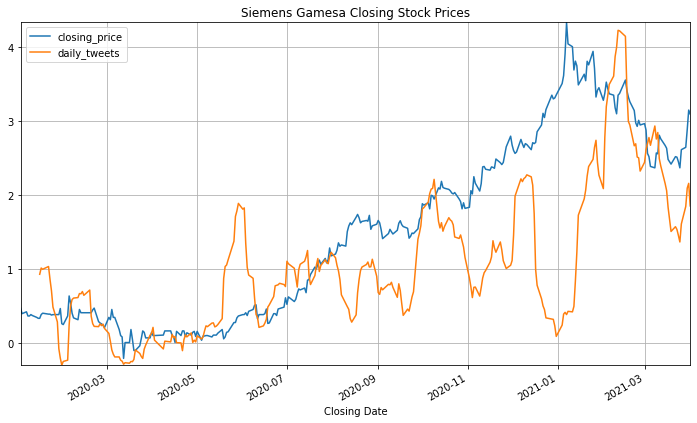

In [132]:
company = 'Siemens Gamesa'
ticker = 'GCTAY'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','daily_tweets']
data = gctay_z_score
plot_popularity_closing(start, end, title, xlabel, ylabel, series, data,window)

## Sunrun

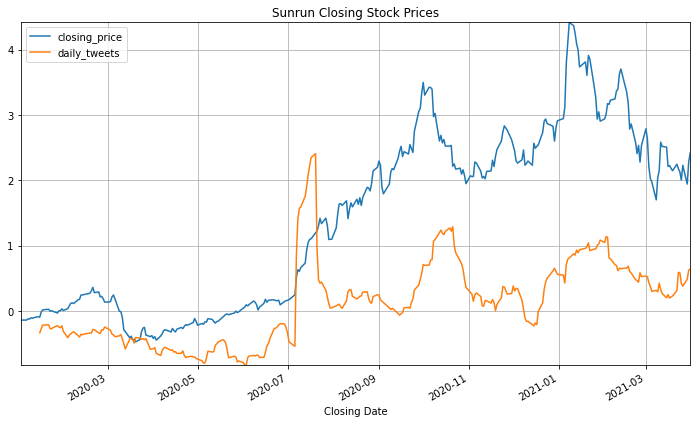

In [133]:
company = 'Sunrun'
ticker = 'RUN'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','daily_tweets']
data = run_z_score
plot_popularity_closing(start, end, title, xlabel, ylabel, series, data,window)

# Plug Power

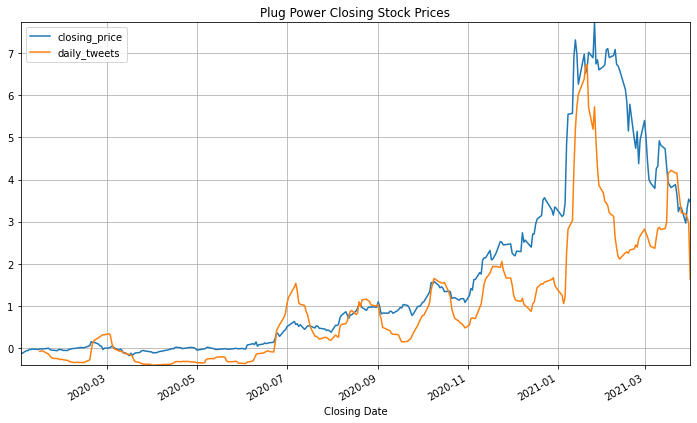

In [134]:
company = 'Plug Power'
ticker = 'PLUG'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','daily_tweets']
data = plug_z_score
plot_popularity_closing(start, end, title, xlabel, ylabel, series, data,window)

# Sunpower

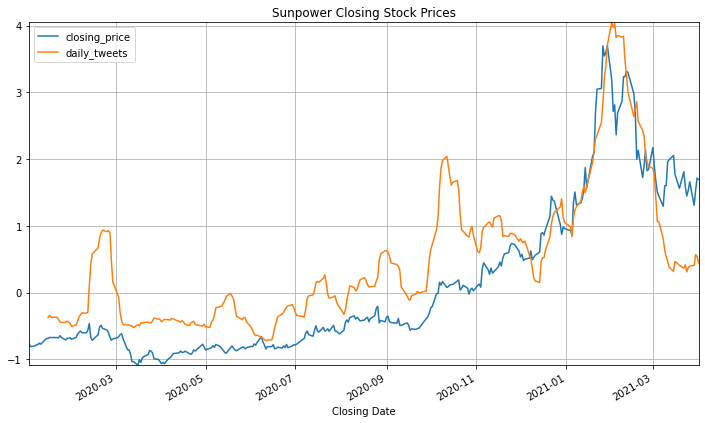

In [135]:
company = 'Sunpower'
ticker = 'SPWR'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','daily_tweets']
data = spwr_z_score
plot_popularity_closing(start, end, title, xlabel, ylabel, series, data,window)

# Sentiment Plots

In [157]:
start = '2020-01-01'
end = '2021-04-01'
window = 10

In [158]:
def plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window):
    ax1 = data[start:end][series[0]].plot(figsize=(8,7), title=title)
    ax2 = data[start:end][series[1]].rolling(window=window).mean().plot(figsize=(12,7), title=title)
#     ax3 = data[start:end][series[2]].rolling(window=window).mean().plot(figsize=(12,7), title=title)
#     ax4 = data[start:end][series[3]].rolling(window=window).mean().plot(figsize=(12,7), title=title)
    ax1.legend(series)
    ax1.autoscale(axis='x',tight=True)
    ax1.autoscale(axis='y',tight=True)
    ax1.set(xlabel=xlabel);
    
    name_of_image =  title + '_' + series[0] + '_' + series[1]  
    plt.grid()
    plt.savefig('./plots_image_sentiment/' + name_of_image)
    plt.show()

# First Solar

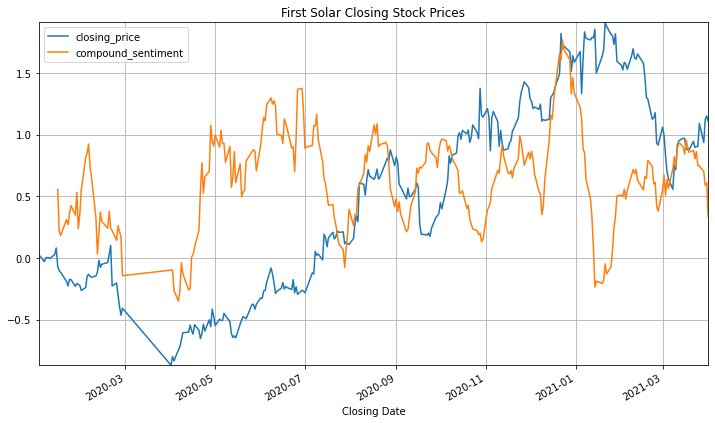

In [159]:
company = 'First Solar'
ticker = 'FSLR'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','compound_sentiment']
data = fslr_z_score
plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window)

# Siemens

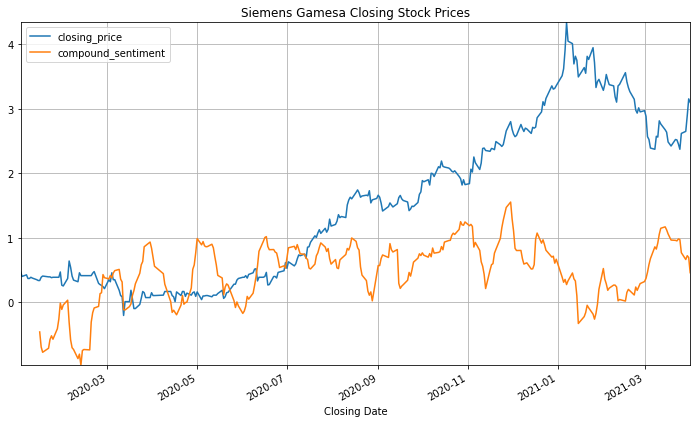

In [160]:
company = 'Siemens Gamesa'
ticker = 'GCTAY'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','compound_sentiment']
data = gctay_z_score
plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window)

# Sunrun

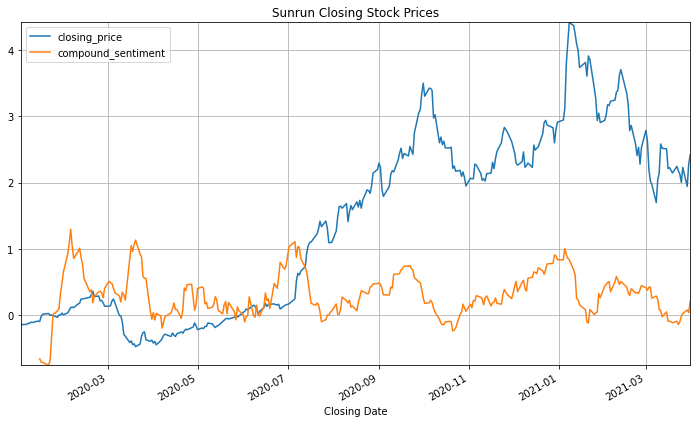

In [161]:
company = 'Sunrun'
ticker = 'RUN'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','compound_sentiment']
data = run_z_score
plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window)

# Plug Power

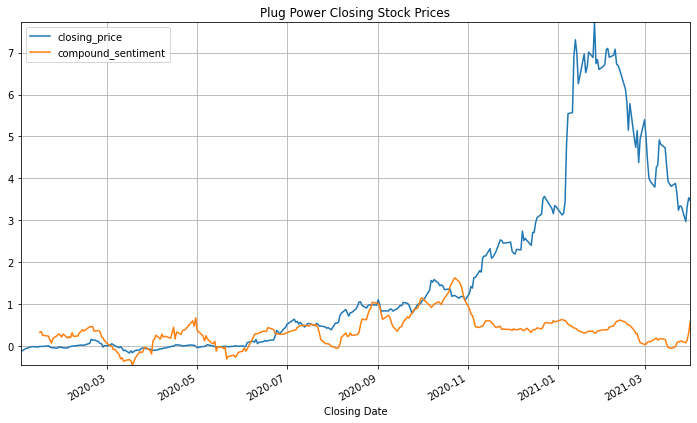

In [162]:
company = 'Plug Power'
ticker = 'PLUG'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','compound_sentiment']
data = plug_z_score
plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window)

# Sunpower

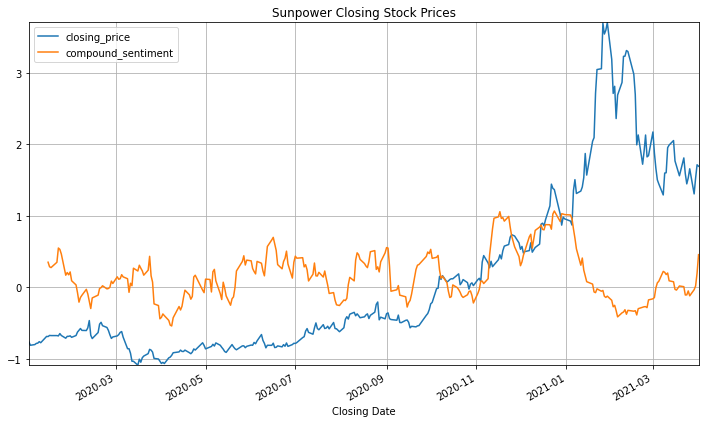

In [163]:
company = 'Sunpower'
ticker = 'SPWR'

title= company + ' Closing Stock Prices'
ylabel='Closing Price (USD) - ' + ticker
xlabel='Closing Date'
series = ['closing_price','compound_sentiment']
data = spwr_z_score
plot_sentiment_closing(start, end, title, xlabel, ylabel, series, data,window)